In [1]:
import os
import os.path
import pandas as pd
import pylab as plt
from matplotlib_venn import venn2
import numpy as np
%matplotlib inline

In [2]:
clust_results_dir = "/Users/johnsolk/Documents/UCDavis/Whitehead/clust_results/by_species/Ensembl_March2019/"
clust_results = os.listdir(clust_results_dir)
clust_results

['Results_04_Mar_19_Folivaceous',
 '.DS_Store',
 'Results_04_Mar_19_Frathbuni',
 'Results_04_Mar_19_Fsimilis',
 'Results_04_Mar_19_Fnotatus',
 'Results_04_Mar_19_Fzebrinus',
 'Results_04_Mar_19_Lgoodei',
 'Results_04_Mar_19_Fparvapinis',
 'Results_04_Mar_19_Fsciadicus',
 'Results_04_Mar_19_FheteroclitusMDPL',
 'Results_04_Mar_19_Lparva',
 'Results_04_Mar_19_Fchrysotus',
 'Results_04_Mar_19_FheteroclitusMDPP',
 'Results_04_Mar_19_Axenica',
 'Results_04_Mar_19_Fcatanatus',
 'Results_04_Mar_19_Fdiaphanus',
 'Results_04_Mar_19_Fgrandis']

In [3]:
species_data = {}
for i in clust_results:
    if i != ".DS_Store":
        species = i.split("_")[-1]
        print(species)
        results_files = os.listdir(clust_results_dir+i)
        clusters_file = [x for x in results_files if x=="Clusters_Objects.tsv"][0]
        clusters = pd.read_csv(clust_results_dir + i + "/" + clusters_file,skiprows=0,sep="\t")
        clusters = clusters.iloc[1:]
        data_files = os.listdir(clust_results_dir + i + "/Processed_Data/")
        data_file = [x for x in data_files if x.endswith(".tsv")][0]
        data = pd.read_csv(clust_results_dir + i + "/Processed_Data/"+data_file,sep="\t",index_col=0)
        species_data[species] = [clusters,data]                       

Folivaceous
Frathbuni
Fsimilis
Fnotatus
Fzebrinus
Lgoodei
Fparvapinis
Fsciadicus
FheteroclitusMDPL
Lparva
Fchrysotus
FheteroclitusMDPP
Axenica
Fcatanatus
Fdiaphanus
Fgrandis


In [4]:
data.head()

,15_ppt,0.2_ppt,transfer
Genes,,,
ENSFHEP00000000003,-1.196918,1.250793,-0.053875
ENSFHEP00000000004,1.157539,0.124848,-1.282387
ENSFHEP00000000005,0.832399,0.573918,-1.406318
ENSFHEP00000000007,0.348049,1.013050,-1.361099
ENSFHEP00000000008,0.486407,0.906821,-1.393228


In [5]:
clusters.head()

,C0 (2318 genes),C1 (1896 genes),C2 (1846 genes),C3 (1202 genes),C4 (1219 genes),C5 (1501 genes),C6 (2308 genes),C7 (1822 genes),C8 (1175 genes),C9 (1154 genes),C10 (1687 genes),C11 (1973 genes)
1,ENSFHEP00000000021,ENSFHEP00000000013,ENSFHEP00000000009,ENSFHEP00000000043,ENSFHEP00000000010,ENSFHEP00000000014,ENSFHEP00000000057,ENSFHEP00000000003,ENSFHEP00000000011,ENSFHEP00000000076,ENSFHEP00000000005,ENSFHEP00000000004
2,ENSFHEP00000000025,ENSFHEP00000000015,ENSFHEP00000000018.1,ENSFHEP00000000046,ENSFHEP00000000054,ENSFHEP00000000026.1,ENSFHEP00000000063,ENSFHEP00000000034,ENSFHEP00000000037,ENSFHEP00000000120.1,ENSFHEP00000000008,ENSFHEP00000000039
3,ENSFHEP00000000029,ENSFHEP00000000017.1,ENSFHEP00000000023.1,ENSFHEP00000000051,ENSFHEP00000000071,ENSFHEP00000000110,ENSFHEP00000000078,ENSFHEP00000000056,ENSFHEP00000000088,ENSFHEP00000000132,ENSFHEP00000000038,ENSFHEP00000000049
4,ENSFHEP00000000035,ENSFHEP00000000020.1,ENSFHEP00000000053,ENSFHEP00000000166,ENSFHEP00000000138,ENSFHEP00000000111,ENSFHEP00000000101,ENSFHEP00000000067,ENSFHEP00000000107,ENSFHEP00000000198,ENSFHEP00000000045,ENSFHEP00000000050
5,ENSFHEP00000000052,ENSFHEP00000000024.1,ENSFHEP00000000055,ENSFHEP00000000171.1,ENSFHEP00000000153.1,ENSFHEP00000000134,ENSFHEP00000000115,ENSFHEP00000000114,ENSFHEP00000000148,ENSFHEP00000000223,ENSFHEP00000000080,ENSFHEP00000000060


# how to connect clusters in each species?

In [8]:
#BW,FW,TR:
#up,up,down
#F_catanatus: C0
#F_rathbuni: C6
#L_goodei: C0
#F_sciadicus: C4
#F_olivaceus: C6
#F_notatus: C0

#Now, go find the genes in these clusters, and plot them, put them all in a dataframe with categories 

In [6]:
cluster_genes = {}
downzeroup_cluster = {"Fcatanatus": "C0",
              "Frathbuni": "C6",
              "Lgoodei": "C0","Fsciadicus":"C4",
              "Folivaceous": "C6",
              "Fnotatus": "C0"}
for species in downzeroup_cluster:
    print(species)
    cluster = species_data[species][0]
    cluster_number = cluster.columns
    for i in cluster_number:
        number = i.split(" ")[0]
        if number == downzeroup_cluster[species]:
            col = cluster[pd.notnull(cluster[i])]
            cluster_genes[species] = col[[i]]

Fcatanatus
Frathbuni
Lgoodei
Fsciadicus
Folivaceous
Fnotatus


2628


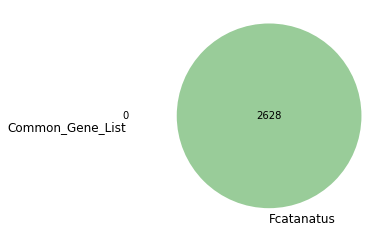

4393


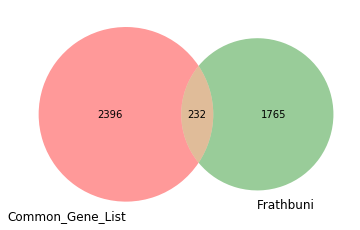

5932


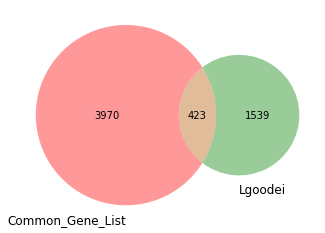

6180


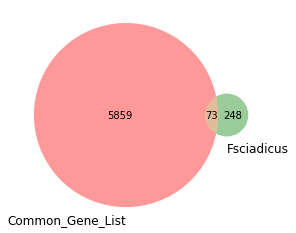

7590


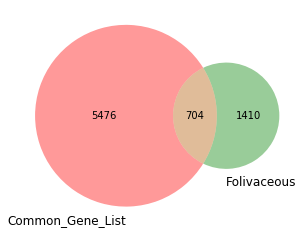

8939


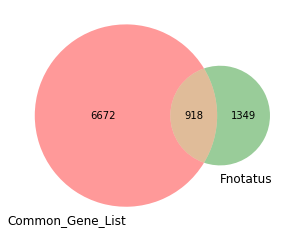

In [7]:
gene_list_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = set(gene_list_common)
    gene_list_common = list(a | b)
    print(len(gene_list_common))
    gene_list_common.extend(gene_list_common)
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show() 

In [8]:
print(len(gene_list_common))
print(len(set(gene_list_common)))
gene_list_common_all = set(gene_list_common)

17878
8939


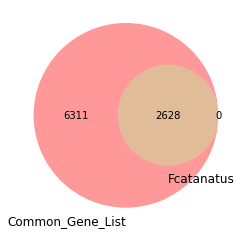

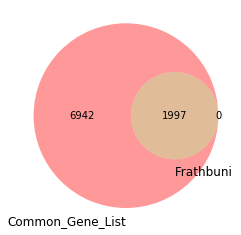

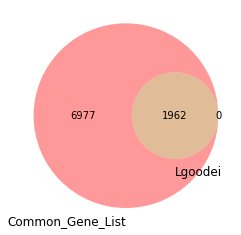

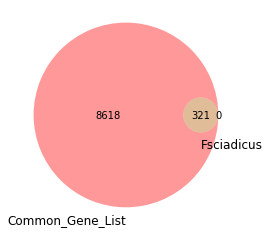

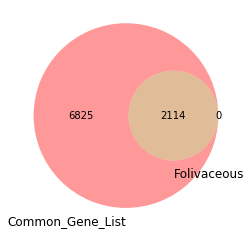

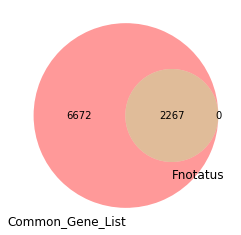

In [9]:
each_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = gene_list_common_all
    each_common.append(list(b.intersection(a)))
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show()

In [10]:
each_common

[['ENSFHEP00000030411',
  'ENSFHEP00000030120.1',
  'ENSFHEP00000011990',
  'ENSFHEP00000020830',
  'ENSFHEP00000022911',
  'ENSFHEP00000027190',
  'ENSFHEP00000017508',
  'ENSFHEP00000002780',
  'ENSFHEP00000011147.1',
  'ENSFHEP00000003490',
  'ENSFHEP00000024910',
  'ENSFHEP00000012226',
  'ENSFHEP00000034647',
  'ENSFHEP00000000080',
  'ENSFHEP00000018772',
  'ENSFHEP00000027780',
  'ENSFHEP00000033734.1',
  'ENSFHEP00000007110',
  'ENSFHEP00000019241',
  'ENSFHEP00000024300',
  'ENSFHEP00000032742',
  'ENSFHEP00000019657',
  'ENSFHEP00000007428.1',
  'ENSFHEP00000028299.1',
  'ENSFHEP00000011441',
  'ENSFHEP00000032951',
  'ENSFHEP00000007448',
  'ENSFHEP00000000394',
  'ENSFHEP00000003660',
  'ENSFHEP00000027761',
  'ENSFHEP00000010476',
  'ENSFHEP00000003276',
  'ENSFHEP00000009692',
  'ENSFHEP00000026846.1',
  'ENSFHEP00000020658.1',
  'ENSFHEP00000035059',
  'ENSFHEP00000015597',
  'ENSFHEP00000032122',
  'ENSFHEP00000020813',
  'ENSFHEP00000005842',
  'ENSFHEP00000021784',
  

In [11]:
set.intersection(*map(set,each_common))

set()

### Therefore, the down-zero-up pattern is not conserved across all freshwater species. What about in clade?

### Clade 1

In [12]:
cluster_genes = {}
downzeroup_cluster_clade1 = {"Fcatanatus": "C0",
              "Frathbuni": "C6"}
for species in downzeroup_cluster_clade1:
    print(species)
    cluster = species_data[species][0]
    cluster_number = cluster.columns
    for i in cluster_number:
        number = i.split(" ")[0]
        if number == downzeroup_cluster[species]:
            col = cluster[pd.notnull(cluster[i])]
            cluster_genes[species] = col[[i]]

Fcatanatus
Frathbuni


2628


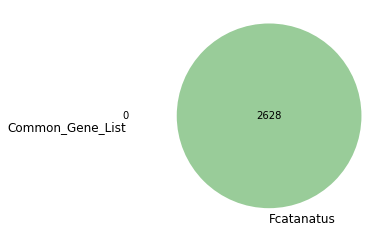

4393


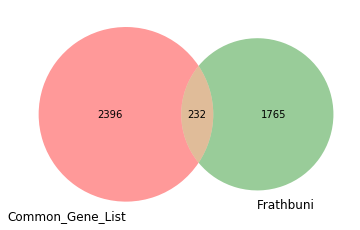

In [13]:
gene_list_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = set(gene_list_common)
    gene_list_common = list(a | b)
    print(len(gene_list_common))
    gene_list_common.extend(gene_list_common)
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show() 

In [14]:
print(len(gene_list_common))
print(len(set(gene_list_common)))
gene_list_common_all = set(gene_list_common)

8786
4393


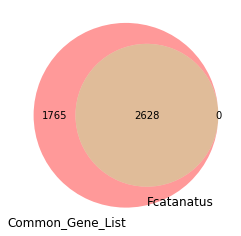

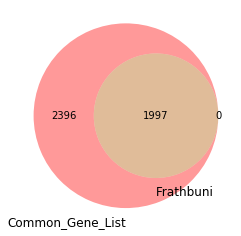

In [15]:
each_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = gene_list_common_all
    each_common.append(list(b.intersection(a)))
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show()

In [16]:
a = set.intersection(*map(set,each_common))

In [17]:
len(a)

232

In [18]:
b = pd.DataFrame(list(a),columns = ['ensembl_peptide_id'])

In [19]:
b.head()

,ensembl_peptide_id
0,ENSFHEP00000009351
1,ENSFHEP00000009987
2,ENSFHEP00000004294
3,ENSFHEP00000007568
4,ENSFHEP00000017315


In [20]:
b.shape

(232, 1)

In [21]:
c = pd.read_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/Ensembl_annotations.csv",index_col=0)

In [22]:
d = pd.merge(b,c,on="ensembl_peptide_id",how="left")

In [23]:
d.shape

(408, 8)

In [24]:
d

,ensembl_peptide_id,ensembl_transcript_id,ensembl_gene_id,gene_biotype,external_gene_name,go_id,description,entrezgene
0,ENSFHEP00000009351,ENSFHET00000000636,ENSFHEG00000010695,protein_coding,smurf1,NaN,SMAD specific E3 ubiquitin protein ligase 1 [S...,105916064.0
1,ENSFHEP00000009987,ENSFHET00000016642,ENSFHEG00000000255,protein_coding,ecm1a,NaN,extracellular matrix protein 1a [Source:ZFIN;A...,NaN
2,ENSFHEP00000004294,ENSFHET00000009107,ENSFHEG00000005219,protein_coding,kremen1,NaN,kringle containing transmembrane protein 1 [So...,105937737.0
3,ENSFHEP00000007568,ENSFHET00000003607,ENSFHEG00000008851,protein_coding,col12a1a,GO:0031099,collagen type XII alpha 1 chain [Source:NCBI g...,105925948.0
4,ENSFHEP00000007568,ENSFHET00000003607,ENSFHEG00000008851,protein_coding,col12a1a,GO:0048679,collagen type XII alpha 1 chain [Source:NCBI g...,105925948.0
5,ENSFHEP00000017315,ENSFHET00000025977,ENSFHEG00000019122,protein_coding,tlk1a,GO:0004672,tousled like kinase 1 [Source:NCBI gene;Acc:10...,105922265.0
6,ENSFHEP00000017315,ENSFHET00000025977,ENSFHEG00000019122,protein_coding,tlk1a,GO:0005524,tousled like kinase 1 [Source:NCBI gene;Acc:10...,105922265.0
7,ENSFHEP00000017315,ENSFHET00000025977,ENSFHEG00000019122,protein_coding,tlk1a,GO:0016301,tousled like kinase 1 [Source:NCBI gene;Acc:10...,105922265.0
8,ENSFHEP00000017315,ENSFHET00000025977,ENSFHEG00000019122,protein_coding,tlk1a,GO:0006468,tousled like kinase 1 [Source:NCBI gene;Acc:10...,105922265.0
9,ENSFHEP00000017315,ENSFHET00000025977,ENSFHEG00000019122,protein_coding,tlk1a,GO:0016310,tousled like kinase 1 [Source:NCBI gene;Acc:10...,105922265.0


### Clade 3

In [25]:
cluster_genes = {}
downzeroup_cluster_clade3 = {"Fsciadicus":"C4","Folivaceous": "C6",
              "Fnotatus": "C0"}
for species in downzeroup_cluster_clade3:
    print(species)
    cluster = species_data[species][0]
    cluster_number = cluster.columns
    for i in cluster_number:
        number = i.split(" ")[0]
        if number == downzeroup_cluster[species]:
            col = cluster[pd.notnull(cluster[i])]
            cluster_genes[species] = col[[i]]

Fsciadicus
Folivaceous
Fnotatus


321


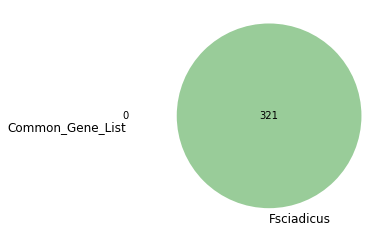

2402


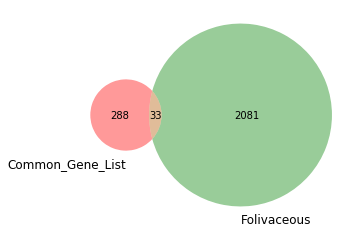

4339


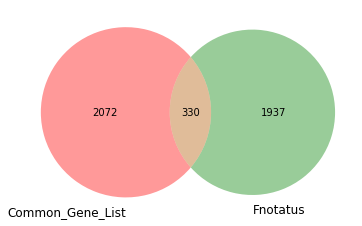

In [26]:
gene_list_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = set(gene_list_common)
    gene_list_common = list(a | b)
    print(len(gene_list_common))
    gene_list_common.extend(gene_list_common)
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show() 

In [27]:
print(len(gene_list_common))
print(len(set(gene_list_common)))
gene_list_common_all = set(gene_list_common)

8678
4339


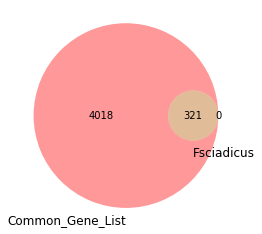

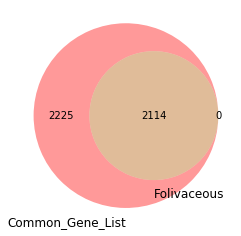

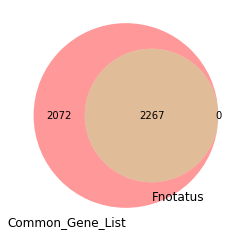

In [28]:
each_common = []
for species in cluster_genes:
    a = set(cluster_genes[species].iloc[:,0].tolist())
    b = gene_list_common_all
    each_common.append(list(b.intersection(a)))
    venn2(subsets = (len(b)-len(a.intersection(b)), 
             len(a)-len(b.intersection(a)), 
             len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
    plt.show()

In [29]:
a = set.intersection(*map(set,each_common))

In [30]:
len(a)

3

In [31]:
b = pd.DataFrame(list(a),columns = ['ensembl_peptide_id'])

In [32]:
b.head()

,ensembl_peptide_id
0,ENSFHEP00000024167
1,ENSFHEP00000009818.1
2,ENSFHEP00000032539


In [33]:
b.shape

(3, 1)

In [34]:
c = pd.read_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/Ensembl_annotations.csv",index_col=0)

In [35]:
d = pd.merge(b,c,on="ensembl_peptide_id",how="left")

In [36]:
d.shape

(3, 8)

In [37]:
d

,ensembl_peptide_id,ensembl_transcript_id,ensembl_gene_id,gene_biotype,external_gene_name,go_id,description,entrezgene
0,ENSFHEP00000024167,ENSFHET00000008482,ENSFHEG00000005566,protein_coding,NaN,NaN,perforin-1 [Source:NCBI gene;Acc:105932752],105932752.0
1,ENSFHEP00000009818.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSFHEP00000032539,ENSFHET00000033937,ENSFHEG00000019065,protein_coding,rhobtb2a,NaN,Rho related BTB domain containing 2 [Source:NC...,105926867.0
